# MEHMET  ARICI  2018165002   İSTATİSTİK  RAPOR  ÇALIŞMASI

#            İKİNCİ EL ARABA İSTATİSTİK RAPORU 

Kullanılacak kütüphaneleri ön belleğe yükleyerek. Kullanılabilir, hale getirilmiştir.

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy as ps
import numpy as np
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

Veri çekme işlemi yapıldı.

In [2]:
IEAGrafik=pd.read_csv('M:/MEHMET ARICI/NotebooksPython/BilgisayarOrganizasyonu/Final/IkinciElAraba.csv')

Veri setinin ilk 10 verisini tablo halinde çıktı almak için.

In [3]:
IEAGrafik.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


Veri setini; IEAGrafik ve IEAModel olarak iki farklı şekilde kullanılabilir hale getirildi.

In [4]:
IEAGrafik.drop(["v.id"], axis=1, inplace=True)
IEAGrafik.columns = ['EskiToplam','GuncelToplam','Yasi','Km','MPuani','DDurumu','KParca','EnYuksekHiz','BeygirGucu','Tork','Fiyat']
IEAModel =IEAGrafik[['EskiToplam','GuncelToplam','Yasi','Km','MPuani','DDurumu','KParca','EnYuksekHiz','BeygirGucu','Tork','Fiyat']] 

MotorPuani ve ArabaParcaDegisimDurumu(APDDurumu) sınıflandırıldı. Sınıflandırılma Sütunları silindi. İlk 3 veri incelendi.

In [5]:
IEAGrafik.loc[(IEAGrafik['MPuani']<3), 'MotorPuani'] = 'Düşük'
IEAGrafik.loc[(IEAGrafik['MPuani']==3), 'MotorPuani'] = 'Normal'
IEAGrafik.loc[(IEAGrafik['MPuani']>3), 'MotorPuani'] = 'Yüksek'

IEAGrafik.loc[(IEAGrafik['DDurumu']<=2), 'APDDurumu'] = 'Çok İyi'
IEAGrafik.loc[(IEAGrafik['DDurumu']>2) &(IEAGrafik['DDurumu']<=4), 'APDDurumu'] = 'İyi'
IEAGrafik.loc[(IEAGrafik['DDurumu']>4) &(IEAGrafik['DDurumu']<=6), 'APDDurumu'] = 'Normal'
IEAGrafik.loc[(IEAGrafik['DDurumu']>6) &(IEAGrafik['DDurumu']<=8), 'APDDurumu'] = 'Kötü'
IEAGrafik.loc[(IEAGrafik['DDurumu']>8), 'APDDurumu'] = 'Çok Kötü'

IEAGrafik.drop(["MPuani","DDurumu"], axis=1, inplace=True)
IEAGrafik.head(3)

,EskiToplam,GuncelToplam,Yasi,Km,KParca,EnYuksekHiz,BeygirGucu,Tork,Fiyat,MotorPuani,APDDurumu
0,535651,798186,3,78945,14,177,73,123,351318.0,Düşük,Çok İyi
1,591911,861056,6,117220,9,148,74,95,285001.5,Yüksek,Çok Kötü
2,686990,770762,2,132538,15,181,53,97,215386.0,Düşük,Kötü


Describe ile değişkenlenr gözlemndi. Tüm sütunlar için oluşturulan IEAModel.describe()' de anlatılacak.

In [6]:
IEAGrafik.describe()

,EskiToplam,GuncelToplam,Yasi,Km,KParca,EnYuksekHiz,BeygirGucu,Tork,Fiyat
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,601648.286000,799131.3970,4.561000,100274.430000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,58407.246204,57028.9502,1.719079,29150.463233,2.230549,19.28838,20.51694,21.058716,126073.25915
min,500265.000000,700018.0000,2.000000,50324.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,548860.500000,750997.7500,3.000000,74367.500000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,601568.000000,798168.0000,5.000000,100139.500000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,652267.250000,847563.2500,6.000000,125048.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,699859.000000,899797.0000,7.000000,149902.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


#  ARABALAR İLE İLGİLİ BAZI GRAFİKLER

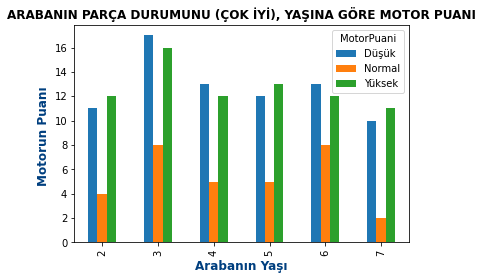

In [7]:
mask=(IEAGrafik.APDDurumu=='Çok İyi')
freq=pd.crosstab(IEAGrafik[mask].Yasi,IEAGrafik[mask].MotorPuani)
freq.plot(kind='bar')
plt.xlabel("Arabanın Yaşı",color="#003f7f", fontsize = 12, weight='bold')
plt.ylabel("Motorun Puanı ",color="#003f7f", fontsize = 12, weight='bold')
plt.title("ARABANIN PARÇA DURUMUNU (ÇOK İYİ), YAŞINA GÖRE MOTOR PUANI", fontsize = 12, weight='bold')
plt.show()

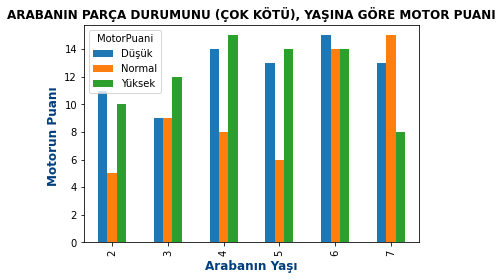

In [8]:
mask=(IEAGrafik.APDDurumu=='Çok Kötü')
freq=pd.crosstab(IEAGrafik[mask].Yasi,IEAGrafik[mask].MotorPuani)
freq.plot(kind='bar')
plt.xlabel("Arabanın Yaşı",color="#003f7f", fontsize = 12, weight='bold')
plt.ylabel("Motorun Puanı ",color="#003f7f", fontsize = 12, weight='bold')
plt.title("ARABANIN PARÇA DURUMUNU (ÇOK KÖTÜ), YAŞINA GÖRE MOTOR PUANI", fontsize = 12, weight='bold')
plt.show()

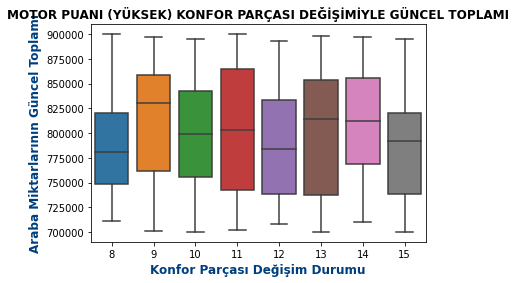

In [9]:
mask=( IEAGrafik.MotorPuani=="Yüksek")
sns.boxplot(x="KParca", y="GuncelToplam", data=IEAGrafik[mask])
plt.xlabel("Konfor Parçası Değişim Durumu",color="#003f7f", fontsize = 12, weight='bold')
plt.ylabel("Araba Miktarlarının Güncel Toplamı",color="#003f7f", fontsize = 12, weight='bold')
plt.title("MOTOR PUANI (YÜKSEK) KONFOR PARÇASI DEĞİŞİMİYLE GÜNCEL TOPLAMI", fontsize = 12, weight='bold')
plt.show()

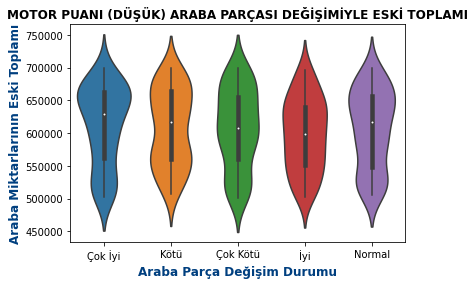

In [10]:
mask=( IEAGrafik.MotorPuani=="Düşük")
sns.violinplot(x="APDDurumu", y="EskiToplam", data=IEAGrafik[mask])
plt.xlabel("Araba Parça Değişim Durumu",color="#003f7f", fontsize = 12, weight='bold')
plt.ylabel("Araba Miktarlarının Eski Toplamı",color="#003f7f", fontsize = 12, weight='bold')
plt.title("MOTOR PUANI (DÜŞÜK) ARABA PARÇASI DEĞİŞİMİYLE ESKİ TOPLAMI", fontsize = 12, weight='bold')
plt.show()

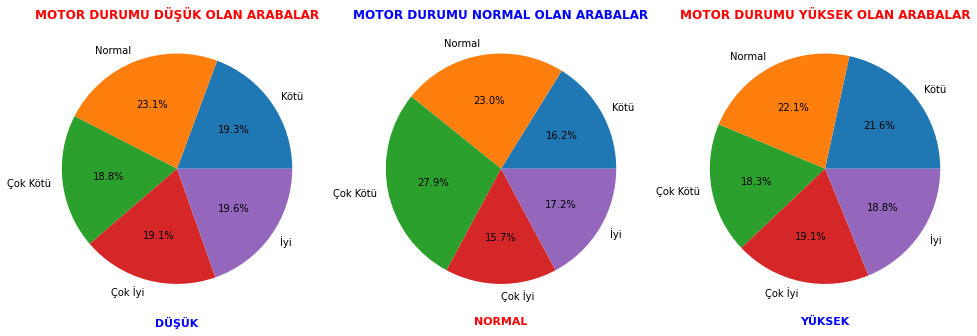

In [11]:
freq=pd.crosstab(IEAGrafik.APDDurumu,IEAGrafik.MotorPuani)
plt.axes([0.00,0.05,1,1])
freq['Düşük'].plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.xlabel('DÜŞÜK',color="b", fontsize = 11, weight='bold')
plt.title('MOTOR DURUMU DÜŞÜK OLAN ARABALAR',color="r", fontsize = 12, weight='bold')

plt.axes([0.75,0.05,1,1])
freq['Normal'].plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.xlabel('NORMAL',color="r", fontsize = 11, weight='bold')
plt.title('MOTOR DURUMU NORMAL OLAN ARABALAR',color="b", fontsize = 12, weight='bold')

plt.axes([1.5,0.05,1,1])
freq['Yüksek'].plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.xlabel('YÜKSEK',color="b", fontsize = 11, weight='bold')
plt.title('MOTOR DURUMU YÜKSEK OLAN ARABALAR',color="r", fontsize = 12, weight='bold')
plt.show()

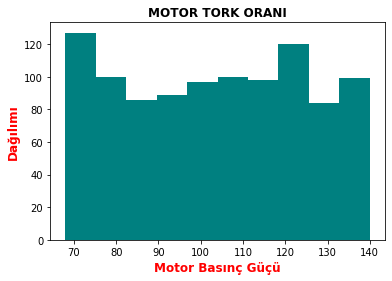

In [12]:
plt.hist(IEAGrafik.Tork,color='#008080') 
plt.xlabel("Motor Basınç Güçü",color="r", fontsize = 12, weight='bold')
plt.ylabel("Dağılımı",color="r", fontsize = 12, weight='bold')
plt.title("MOTOR TORK ORANI", fontsize = 12, weight='bold')
plt.show()

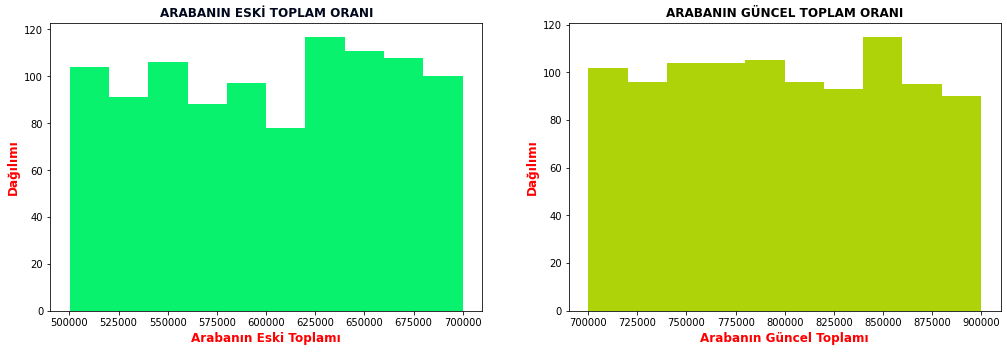

In [13]:
plt.axes([0.01,1.21,1,1])
plt.hist(IEAGrafik.EskiToplam,color='#09f26e') 
plt.xlabel("Arabanın Eski Toplamı",color="r", fontsize = 12, weight='bold')
plt.ylabel("Dağılımı",color="r", fontsize = 12, weight='bold')
plt.title("ARABANIN ESKİ TOPLAM ORANI",color="#01071c", fontsize = 12, weight='bold')

plt.axes([1.21,1.21,1,1])
plt.hist(IEAGrafik.GuncelToplam,color='#aed308') 
plt.xlabel("Arabanın Güncel Toplamı",color="r", fontsize = 12, weight='bold')
plt.ylabel("Dağılımı",color="r", fontsize = 12, weight='bold')
plt.title("ARABANIN GÜNCEL TOPLAM ORANI", fontsize = 12, weight='bold')
plt.show()

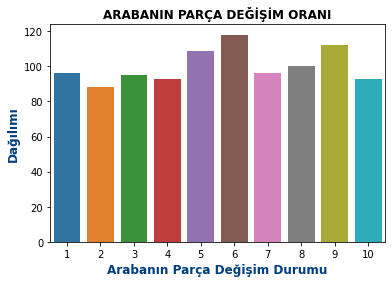

In [14]:
sns.countplot(x = 'DDurumu',data = IEAModel)
plt.xlabel("Arabanın Parça Değişim Durumu",color="#003f7f", fontsize = 12, weight='bold')
plt.ylabel("Dağılımı",color="#003f7f", fontsize = 12, weight='bold')
plt.title("ARABANIN PARÇA DEĞİŞİM ORANI", fontsize = 12, weight='bold')
plt.show()

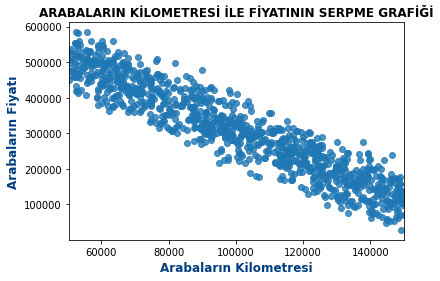

In [15]:
sns.regplot(x='Km',y='Fiyat',data=IEAGrafik)
plt.xlabel("Arabaların Kilometresi",color="#003f7f", fontsize = 12, weight='bold')
plt.ylabel("Arabaların Fiyatı",color="#003f7f", fontsize = 12, weight='bold')
plt.title("ARABALARIN KİLOMETRESİ İLE FİYATININ SERPME GRAFİĞİ", fontsize = 12, weight='bold')
plt.show()

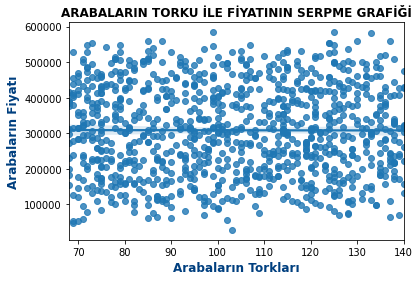

In [16]:
sns.regplot(x='Tork',y='Fiyat',data=IEAGrafik)
plt.xlabel("Arabaların Torkları",color="#003f7f", fontsize = 12, weight='bold')
plt.ylabel("Arabaların Fiyatı",color="#003f7f", fontsize = 12, weight='bold')
plt.title("ARABALARIN TORKU İLE FİYATININ SERPME GRAFİĞİ", fontsize = 12, weight='bold')
plt.show()

# ARABA FİYATI TAHMİNİ MODELLERİ

In [17]:
IEAModel.describe()

,EskiToplam,GuncelToplam,Yasi,Km,MPuani,DDurumu,KParca,EnYuksekHiz,BeygirGucu,Tork,Fiyat
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [18]:
IEAModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EskiToplam    1000 non-null   int64  
 1   GuncelToplam  1000 non-null   int64  
 2   Yasi          1000 non-null   int64  
 3   Km            1000 non-null   int64  
 4   MPuani        1000 non-null   int64  
 5   DDurumu       1000 non-null   int64  
 6   KParca        1000 non-null   int64  
 7   EnYuksekHiz   1000 non-null   int64  
 8   BeygirGucu    1000 non-null   int64  
 9   Tork          1000 non-null   int64  
 10  Fiyat         1000 non-null   float64
dtypes: float64(1), int64(10)
memory usage: 86.1 KB


In [19]:
IEAModel.corr()

,EskiToplam,GuncelToplam,Yasi,Km,MPuani,DDurumu,KParca,EnYuksekHiz,BeygirGucu,Tork,Fiyat
EskiToplam,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
GuncelToplam,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
Yasi,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
Km,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
MPuani,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
DDurumu,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
KParca,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
EnYuksekHiz,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
BeygirGucu,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238
Tork,0.008950,0.017955,0.028859,0.013566,0.004408,0.047805,0.041632,-0.019697,-0.013817,1.000000,-0.002290


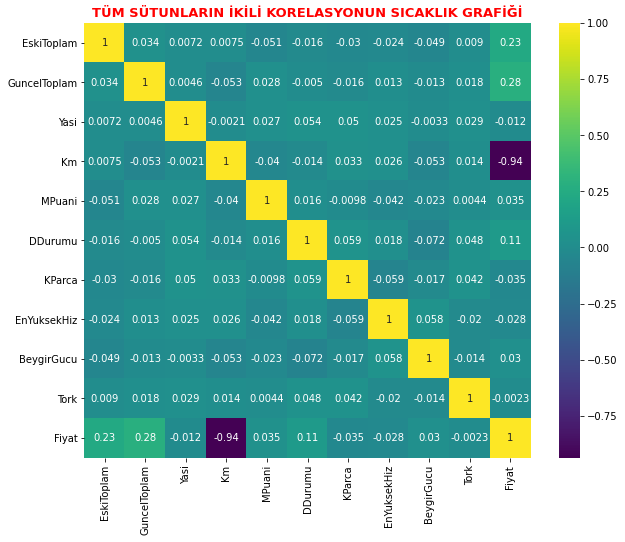

In [20]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(IEAModel.corr(), annot=True, cmap = 'viridis')
plt.title("TÜM SÜTUNLARIN İKİLİ KORELASYONUN SICAKLIK GRAFİĞİ",color='r', fontsize = 13, weight='bold')
plt.show()

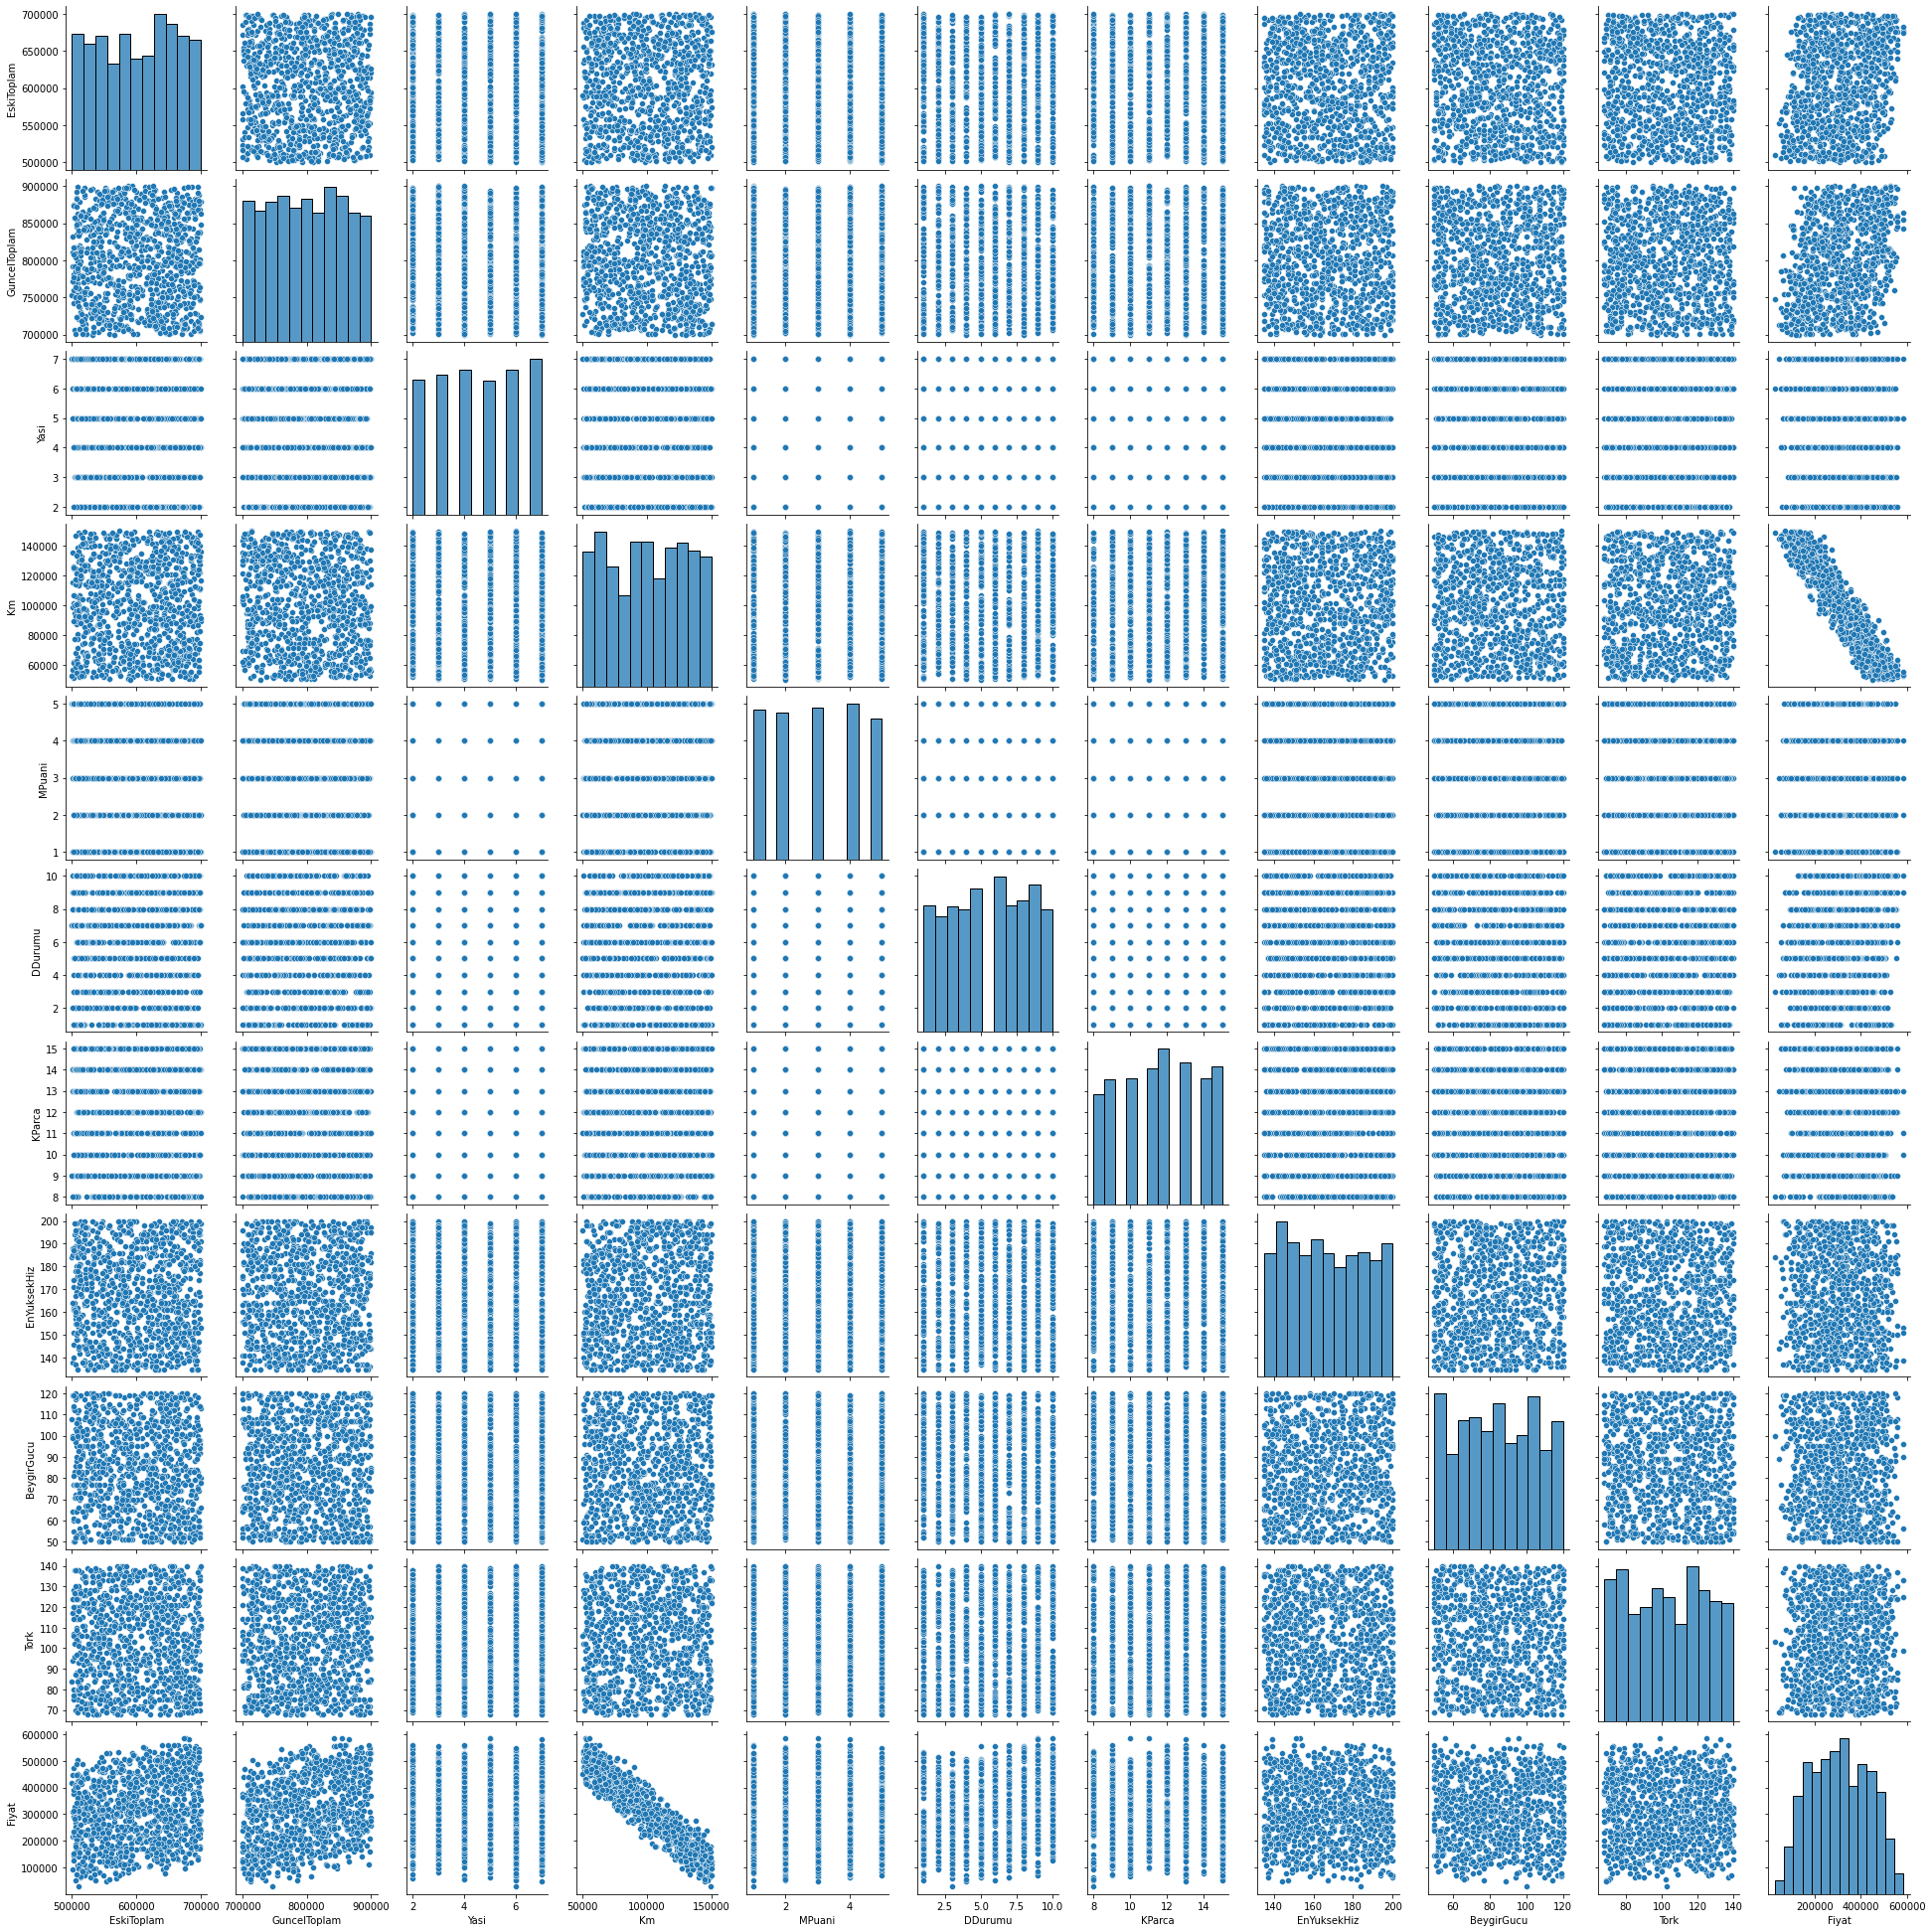

In [21]:
sns.pairplot(IEAModel)
plt.show()

In [23]:
y, X = ps.dmatrices('Fiyat ~ EskiToplam + GuncelToplam + Yasi + Km + MPuani + DDurumu + KParca + EnYuksekHiz + BeygirGucu + Tork', data=IEAModel, return_type="dataframe")
LRModeli = sm.OLS(y, X)
fit = LRModeli.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Fiyat   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 2.072e+04
Date:                Tue, 19 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:15:34   Log-Likelihood:                -10488.
No. Observations:                1000   AIC:                         2.100e+04
Df Residuals:                     989   BIC:                         2.105e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.383e+04   6046.330     -2.287      0.022   -2.57e+04   -1961.431
EskiToplam       0.5057      0.005    106.452      0.000       0.496       0.515
GuncelToplam     0.5003      0.005    102.949      0.000       0.491       0.510
Yasi         -1622.3890    161.327    -10.057      0.000   -1938.972   -1305.806
Km              -3.9961      0.010   -419.521      0.000      -4.015      -3.977
MPuani         230.9884    197.816      1.168      0.243    -157.199     619.175
DDurumu       4628.4689     98.541     46.970      0.000    4435.096    4821.842
KParca          62.4643    124.716      0.501      0.617    -182.275     307.203
EnYuksekHiz    -14.5732     14.413     -1.011      0.312     -42.856      13.710
BeygirGucu      20.3599     13.569      1.500      0.134      -6.268      46.988
Tork            -1.7328     13.157     -0.132      0.895     -27.551      24.086
==============================================================================
Omnibus:                       83.060   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.422
Skew:                           0.736   Prob(JB):                     1.15e-21
Kurtosis:                       2.620   Cond. No.                     2.20e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# LİNEAR REGRESSİON MODELİ

X ve y değerleri belirlendi

In [24]:
X = IEAModel.loc[:,['EskiToplam','GuncelToplam','Yasi','Km','MPuani','DDurumu','KParca','EnYuksekHiz','BeygirGucu','Tork']]
y=IEAModel['Fiyat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [25]:
LR = linear_model.LinearRegression()
LRModeli = LR.fit(X_train, y_train)
LRpredictions = LR.predict(X_test)
LRpredictions[0:5]

array([373162.06652492, 513424.22156003, 155733.50826739, 164108.7152749 ,
       510432.21078703])

In [26]:
scores_LR = cross_val_score(LR, X, y, cv=10)
scores_LR

array([0.99519019, 0.99451568, 0.99576183, 0.99605278, 0.99510114,
       0.99358522, 0.99545023, 0.9951911 , 0.99536837, 0.99399761])

In [27]:
scores_LR.mean()

0.9950214147483963

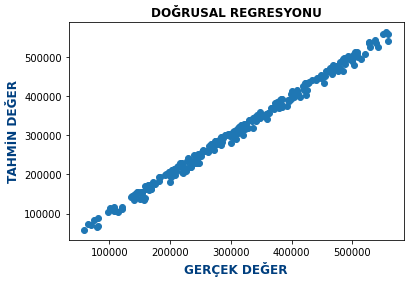

In [28]:
plt.scatter(y_test, LRpredictions)
plt.xlabel("GERÇEK DEĞER", color="#003f7f", fontsize = 12, weight='bold')
plt.ylabel("TAHMİN DEĞER", color="#003f7f", fontsize = 12, weight='bold')
plt.title("DOĞRUSAL REGRESYONU", fontsize = 12, weight='bold')
plt.show()

# DECİSİON TREE REGRESSİON MODELİ

In [29]:
DTR = DecisionTreeRegressor(random_state=0)
DTR.fit(X,y)
DTRpredictions = DTR.predict(X_test)

In [30]:
scores_DTR= cross_val_score(DTR, X, y, cv=10)
scores_DTR

array([0.94066896, 0.94803097, 0.95397888, 0.9651149 , 0.9484824 ,
       0.92364486, 0.9620908 , 0.96325461, 0.9465995 , 0.93508497])

In [31]:
scores_DTR.mean()

0.9486950854778465

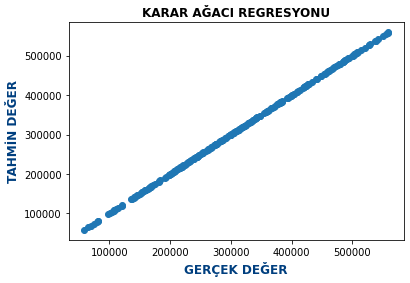

In [32]:
plt.scatter(y_test, DTRpredictions)
plt.xlabel("GERÇEK DEĞER", color="#003f7f", fontsize = 12, weight='bold')
plt.ylabel("TAHMİN DEĞER", color="#003f7f", fontsize = 12, weight='bold')
plt.title("KARAR AĞACI REGRESYONU", fontsize = 12, weight='bold')
plt.show()

# RANDOM FOREST REGRESSİON MODELİ

In [33]:
X, y = make_regression(n_features=3, n_informative=2, random_state=0, shuffle=False)
RFR= RandomForestRegressor(max_depth=2, random_state=0)
RFR.fit(X, y)
RFRpredictions = RFR.predict(X)

In [34]:
scores_RFR = cross_val_score(RFR, X, y, cv=10)
scores_RFR

array([ 0.59147537,  0.72737673,  0.8182976 ,  0.62461008,  0.59492016,
        0.77460947,  0.69831054,  0.71337219,  0.81882481, -0.03063339])

In [35]:
scores_RFR.mean()

0.633116357493986

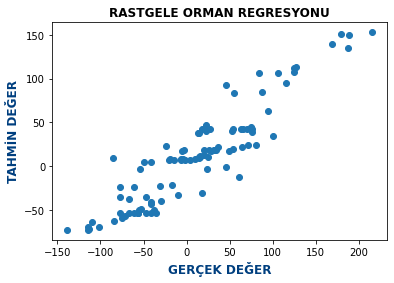

In [36]:
plt.scatter(y, RFRpredictions)
plt.xlabel("GERÇEK DEĞER", color="#003f7f", fontsize = 12, weight='bold')
plt.ylabel("TAHMİN DEĞER", color="#003f7f", fontsize = 12, weight='bold')
plt.title("RASTGELE ORMAN REGRESYONU", fontsize = 12, weight='bold')
plt.show()

In [37]:
print('Linear Regression :', scores_LR.mean())
print('Decision Tree Regression :', scores_DTR.mean())
print('Random Forest Regression :', scores_RFR.mean())

Linear Regression : 0.9950214147483963
Decision Tree Regression : 0.9486950854778465
Random Forest Regression : 0.633116357493986


In [38]:
data = [['Doğrusal', scores_LR.mean()],['Karar Ağacı', scores_DTR.mean()],['Rastgele Orman', scores_RFR.mean()]]
modelDataFrame = pd.DataFrame(data, columns = ['Model', 'Scores'])
modelDataFrame

,Model,Scores
0,Doğrusal,0.995021
1,Karar Ağacı,0.948695
2,Rastgele Orman,0.633116


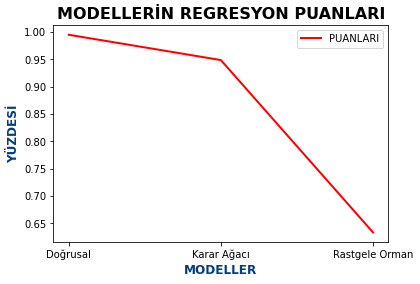

In [39]:
plt.plot( 'Model', 'Scores', data=modelDataFrame, marker='', color='r', linewidth=2, label="PUANLARI")
plt.legend()
plt.xlabel("MODELLER",color="#003f7f", fontsize = 12, weight='bold')
plt.ylabel("YÜZDESİ",color="#003f7f", fontsize = 12, weight='bold')
plt.title('MODELLERİN REGRESYON PUANLARI',fontsize = 16, weight='bold')
plt.show()

# MEHMET ARICI 2018165002